synthe_size_me


In [1]:
#Synthe_size_me

In [1]:
#print("Hello World")
print("Hello World")

Hello World


In [6]:
#Load imports
import os
import sys
from synthesizers import Load, pipeline

In [2]:
#Testing
Load("mstz/breast").Synthesize(split_size=0.8, gen_count=10000, eval_target_col="is_cancer", save_name="breast.xlsx", save_key="synth")

Generating train split: 683 examples [00:00, 3844.50 examples/s]
  5%|▍         | 468/10000 [01:45<29:15,  5.43it/s]  

: 

In [3]:
Load("mstz/breast").Synthesize(split_size=0.8, gen_count=100, eval_target_col="is_cancer", save_name="breast.xlsx", save_key="synth")

 11%|█         | 1099/10000 [03:34<29:00,  5.11it/s]  


[{'train':      clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                  3                        3                         2   
1                  5                        1                         1   
2                  5                        1                         1   
3                  5                        1                         1   
4                  8                        6                         7   
..               ...                      ...                       ...   
541                1                        1                         1   
542                1                        1                         1   
543                5                        4                         5   
544                1                        1                         1   
545                6                        1                         3   

     marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                   

In [7]:
Load("mstz/breast").Synthesize(split_size=[0.8, 0.9], gen_count=[1000, 10000], eval_target_col="is_cancer")

  3%|▎         | 329/10000 [01:00<29:36,  5.44it/s]  


RuntimeError: NaNs detected in the discriminator loss

In [8]:
Load("mstz/breast").Synthesize(split_size=[0.8, 0.9], train_plugin=["adsgan", "ctgan"], gen_count=[1000, 10000], eval_target_col="is_cancer", save_name="breast_multiple")

  5%|▍         | 94/2000 [00:17<05:45,  5.51it/s]


RuntimeError: NaNs detected in the generator loss

In [9]:
state = Load("breast.xlsx").Split(size=0.2).Train(plugin="tvae").Generate(count=[100, 1000, 10000, 100000]).Save(name=f"breast.csv", key="synth")

 40%|████      | 400/1000 [00:24<00:36, 16.40it/s]


In [10]:
state = Load("breast.xlsx").Split(size=0.2).Train(plugin="tvae")
for count in (100, 1000, 10000, 100000):
    state.Generate(count=count).Save(name=f"breast-{count}.csv", key="synth")

 50%|█████     | 500/1000 [00:30<00:30, 16.40it/s]


In [11]:
pipeline("synthesize", eval_target_col="is_cancer")("breast.xlsx")

  3%|▎         | 349/10000 [00:23<11:03, 14.55it/s]


[{'train':     Unnamed: 0  clump_thickness  uniformity_of_cell_size  \
0            9                7                       10   
1           87                8                        5   
2           86                7                        5   
3           48                7                       10   
4            5                7                        9   
..         ...              ...                      ...   
75           8                8                        9   
76          74                8                        5   
77          33                7                        5   
78           0                3                        1   
79          61                5                        1   

    uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                         10                 10                           10   
1                          4                  3                            4   
2                          3

In [12]:
pipeline("synthesize", train_plugin="bayesian_network", eval_target_col="is_cancer")("breast.xlsx")

03/06/2024 16:45:01:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:01:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.


[{'train':     Unnamed: 0  clump_thickness  uniformity_of_cell_size  \
0            3                4                        2   
1           18                3                        1   
2           84                2                        1   
3           78                4                        1   
4           70                3                        1   
..         ...              ...                      ...   
75          74                8                        5   
76          39                5                        5   
77           6                5                        1   
78          21                4                        1   
79          36                3                        1   

    uniformity_of_cell_shape  marginal_adhesion  single_epithelial_cell_size  \
0                          1                  1                            2   
1                          1                  1                            2   
2                          1

In [13]:
pipeline("evaluate", target_col="is_cancer")(pipeline("generate", count=10000)(pipeline("train", plugin="bayesian_network")("mstz/breast")))

03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024 16:45:10:WARNING:Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
03/06/2024

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: Membership inference attack metric did not run, holdout data was not supplied!


[{'train': Dataset({
    features: ['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'is_cancer'],
    num_rows: 683
}), 'test': None, 'synth':       clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                   4                        2                         2   
1                   4                        4                         5   
2                   2                        1                         1   
3                   1                        1                         1   
4                   5                        1                         3   
...               ...                      ...                       ...   
9995                4                        3                         1   
9996                8                        1                         1   
9997                1          

In [21]:
state = Load("mstz/breast").Split(size=0.8).Train().Save("breast_state")

  6%|▋         | 649/10000 [01:58<28:28,  5.47it/s]  


In [25]:
# from README.md
from synthesizers import Load
Load("mstz/breast").Synthesize(split_size=0.8, gen_count=10000, eval_target_col="is_cancer", save_name="breast.xlsx", save_key="synth")
Load("mstz/breast").Split(size=0.8).Train().Generate(count=10000).Evaluate(target_col="is_cancer").Save(name="breast.xlsx", key="synth")
state = Load("mstz/breast").Split(size=0.8).Train()
for count in (100, 1000, 10000, 100000):
    state.Generate(count=count).Save(name=f"breast-{count}.csv", key="synth")
state = Load("mstz/breast").Split(size=0.8).Train().Save("breast_state")
Load("breast_state").Generate(count=10000).Save(name="breast.csv", key="synth")
Load("breast_state").Generate(count=[1000,100000]).Save(name="breast_1000.csv", index=0, key="synth").Save(name="breast_100000.csv", index=1, key="synth")
from synthesizers import pipeline
pipeline("synthesize", split_size=0.8, gen_count=10000, eval_target_col="is_cancer", save_name="breast.json", save_key="synth")("mstz/breast")
state = pipeline("split", size=0.8)("mstz/breast")
state = pipeline("train")(state)
state = pipeline("generate", count=10000)(state)
state = pipeline("evaluate", target_col="is_cancer")
state = pipeline("identity", save_name="breast.json", save_key="synth")

  7%|▋         | 699/10000 [02:13<29:36,  5.24it/s]  


In [26]:
s1 = Load("mstz/breast").Split()
s2 = Load("julien-c/titanic-survival").Split()
train = pipeline("train", plugin="ctgan")

In [27]:
train(s1).Generate(count=1000).Save(name="breast.jsonl", key="synth")
train(s2).Generate(count=1000).Save(name="titanic.jsonl", key="synth")

Creating json from Arrow format: 100%|██████████| 1/1 [00:00<00:00, 250.90ba/s]


[{'train':      Survived  Pclass                            Name     Sex   Age  \
0           1       1     Miss. Helen Monypeny Newsom  female  19.0   
1           0       3  Miss. Ellen Natalia Pettersson  female  18.0   
2           1       3               Mr. Juha Niskanen    male  39.0   
3           0       3          Mr. George Henry Green    male  51.0   
4           0       2        Mr. Charles Henry Davies    male  18.0   
..        ...     ...                             ...     ...   ...   
704         0       1              Mr. Austen Partner    male  45.5   
705         0       3               Mr. Johan Ekstrom    male  45.0   
706         0       3      Mr. Leo Peter Vanden Steen    male  28.0   
707         0       3     Mr. Yousseff Ibrahim Shawah    male  30.0   
708         0       3             Mr. Joseph Jr Elias    male  17.0   

     Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0                          0                        2  26.2833  
1     

In [19]:
import pandas as pd

from syntheval import SynthEval
from synthesizers import Load

df_penguins = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_size.csv")

#Remove any rows containg NaN
df_penguins = df_penguins.dropna()


In [21]:
Load(df_penguins).Synthesize(split_size=0.8, gen_count=1000, eval_target_col="species", save_name="penguins.csv", save_key="synth")

  3%|▎         | 299/10000 [00:33<17:51,  9.05it/s]


Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


[{'train':        species     island  ...  body_mass_g     sex
0       Adelie  Torgersen  ...       3900.0    MALE
1       Adelie      Dream  ...       3500.0  FEMALE
2    Chinstrap      Dream  ...       3500.0  FEMALE
3       Adelie  Torgersen  ...       3325.0    MALE
4       Adelie  Torgersen  ...       3800.0    MALE
..         ...        ...  ...          ...     ...
262     Gentoo     Biscoe  ...       4550.0  FEMALE
263     Gentoo     Biscoe  ...       5500.0    MALE
264     Adelie      Dream  ...       3475.0  FEMALE
265     Gentoo     Biscoe  ...       5050.0  FEMALE
266     Adelie      Dream  ...       4150.0    MALE

[267 rows x 7 columns], 'test':       species     island  ...  body_mass_g     sex
0      Adelie     Biscoe  ...       3150.0  FEMALE
1      Gentoo     Biscoe  ...       5000.0  FEMALE
2      Adelie      Dream  ...       4250.0    MALE
3      Gentoo     Biscoe  ...       4800.0  FEMALE
4      Gentoo     Biscoe  ...       5300.0    MALE
..        ...        ...  

In [13]:
#SynthEval test
import pandas as pd

from syntheval import SynthEval

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_BN_syn.csv").round(1) # be sure to round to an appropriate number of decimals

### Testing data is not required, but the usability analysis will be more complete if it is included. 
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_test.csv")

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:03<00:02,  2.49it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:04<00:00,  3.64it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.0059  0.0078   |
| PCA difference in eigenvalues (exp. var.):   0.0025           |
| PCA angle between eigenvectors (radians) :   0.0065           |
| Average confidence interval overlap      :   0.6825  0.0630   |
|   -> # non-overlapping COIs at 95%       :    0               |
|   -> fraction of non-overlapping CIs     :   0.0000           |
| Mixed correlation matrix difference      :   0.1046           |
| Pairwise mutual information difference   :   0.5585           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.0313  0.0033   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.0368  0.0036   |
|       -> avg. Total Variation Distance   :   0.0239  0.0021   |
|   -> average combined p-val

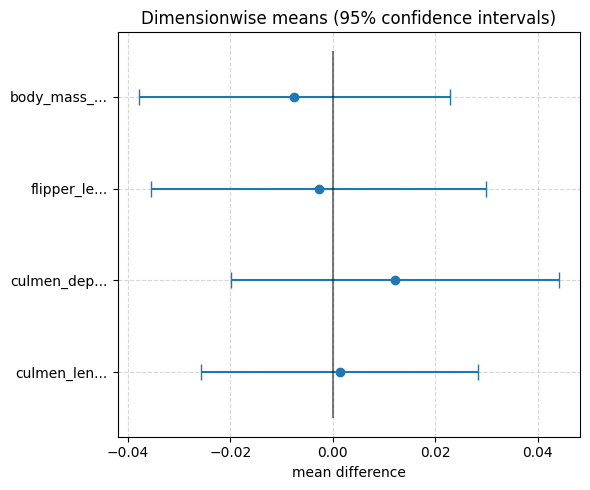

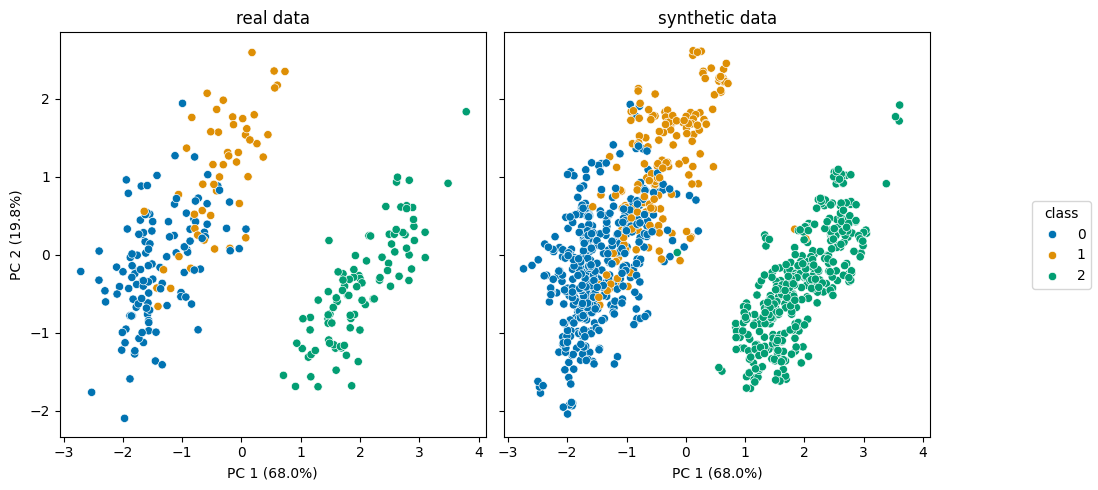

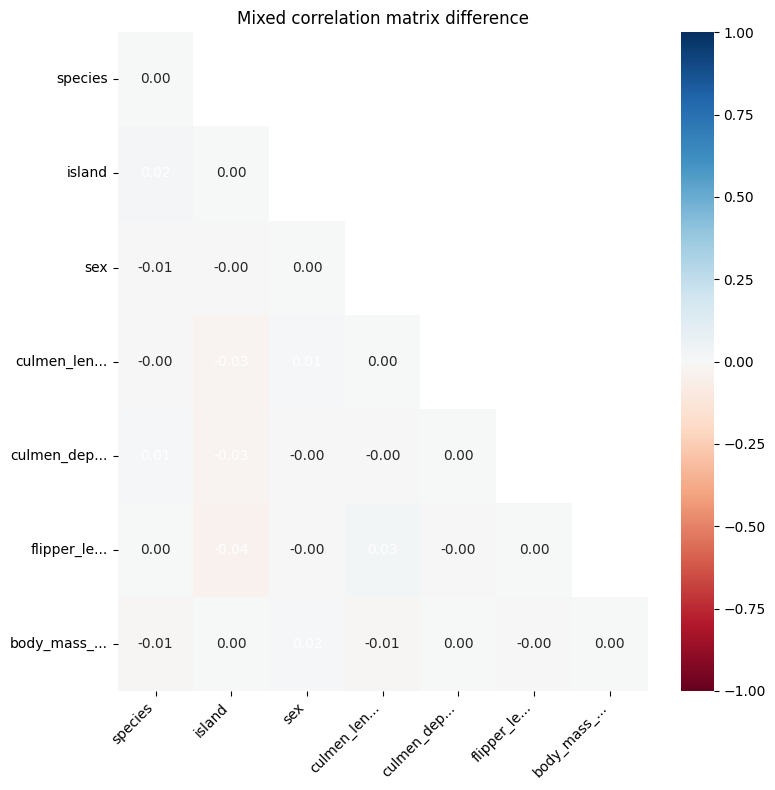

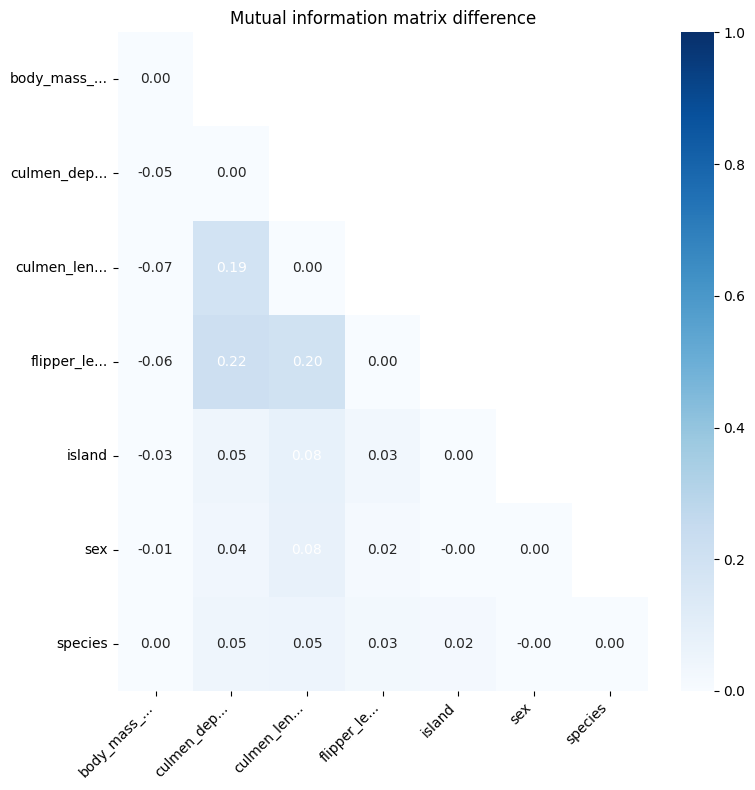

In [14]:
### First SynthEval object is created then run with the "full_eval" presets file.
S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")   # The _ is for Jupyter purposes only, to avoid printing the results dictionary as well.

In the next example we try to show the full extend of the flexibility of SynthEval. The evaluator has both one of the preset files, as well as additional metrics supplied. Note that the "ks_test" is already part of the "fast_eval" preset file, but feeding as an additional keyword argument overrides the preset option configuration. To save custom configurations, for easy reproduceability, when keyword arguments are supplied, a SE_config.json file is saved. Instead of calling one of the presets, a filepath to a SE_config.json file can also be fed.

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/8 [00:00<?, ?it/s]

Syntheval: ks_test:  38%|███▊      | 3/8 [00:00<00:01,  4.37it/s]


TypeError: KolmogorovSmirnovTest.evaluate() got an unexpected keyword argument 'do_permutation'

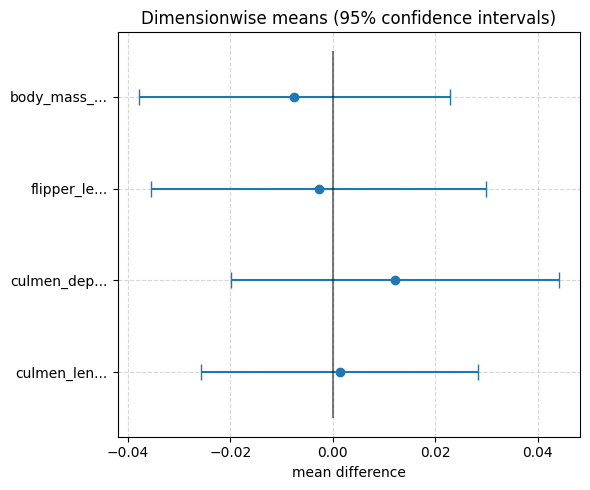

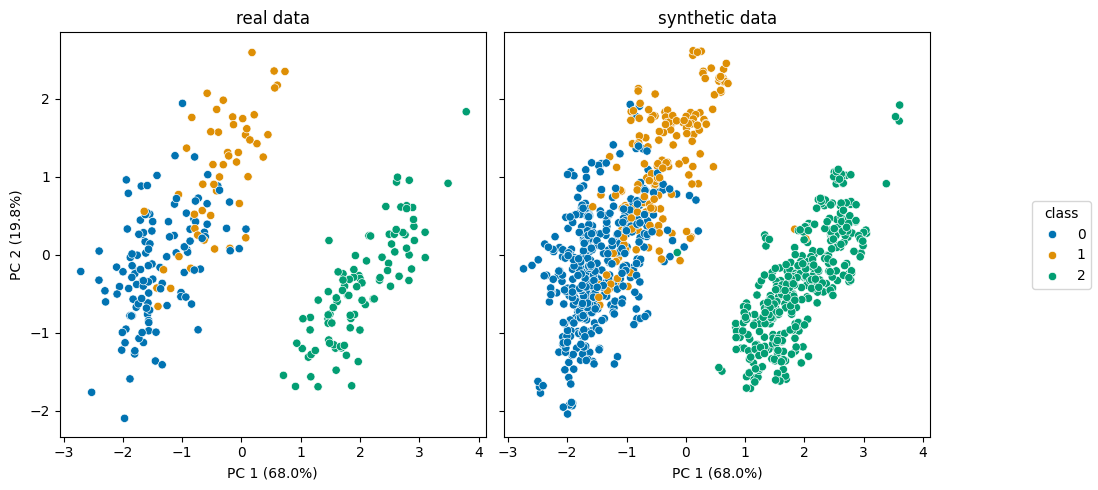

In [18]:
S = SynthEval(df_real,holdout_dataframe=df_test,nn_distance='euclid',unique_threshold=5)
_ = S.evaluate(df_fake,target_column,presets_file="fast_eval",ks_test={"do_permutation": False})

In [24]:
#SynthEval test 2
import pandas as pd

from syntheval import SynthEval

target_column = 'species'                           # column to use as target for classification metrics and coloration of PCA plot.
categorical_columns = ['species','island','sex']    # Categorical columns can be either supplied or automatically inferred using a number of unique values threshold.

df_real = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_train.csv")
df_fake = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Code\penguins.csv").round(1) # be sure to round to an appropriate number of decimals

#Remove first column from df_fake
df_fake = df_fake.iloc[:, 1:]

### Testing data is not required, but the usability analysis will be more complete if it is included. 
df_test = pd.read_csv(r"C:\Users\lucas\Desktop\Data_Science\Speciale\Data\penguin_data\penguins_test.csv")

SynthEval: inferred categorical columns...
SynthEval: synthetic data read successfully


Syntheval: dwm:   0%|          | 0/17 [00:00<?, ?it/s]

Syntheval: cls_acc:  59%|█████▉    | 10/17 [00:04<00:03,  2.06it/s]   

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


Syntheval: att_discl:  82%|████████▏ | 14/17 [00:05<00:00,  3.24it/s]

Error: Membership inference attack metric did not run, holdout data was not supplied!


Syntheval: att_discl: 100%|██████████| 17/17 [00:06<00:00,  2.62it/s]


SynthEval results

Utility metric description                    value   error                                 
+---------------------------------------------------------------+
| Average dimensionwise means diff. (nums) :   0.1023  0.0078   |
| PCA difference in eigenvalues (exp. var.):   0.1008           |
| PCA angle between eigenvectors (radians) :   0.0816           |
| Average confidence interval overlap      :   0.0000  0.0000   |
|   -> # non-overlapping COIs at 95%       :    4               |
|   -> fraction of non-overlapping CIs     :   1.0000           |
| Mixed correlation matrix difference      :   0.7940           |
| Pairwise mutual information difference   :   0.6490           |
| Kolmogorov–Smirnov / Total Variation Distance test            |
|   -> average combined statistic          :   0.2305  0.0354   |
|       -> avg. Kolmogorov–Smirnov dist.   :   0.2627  0.0536   |
|       -> avg. Total Variation Distance   :   0.1876  0.0375   |
|   -> average combined p-val

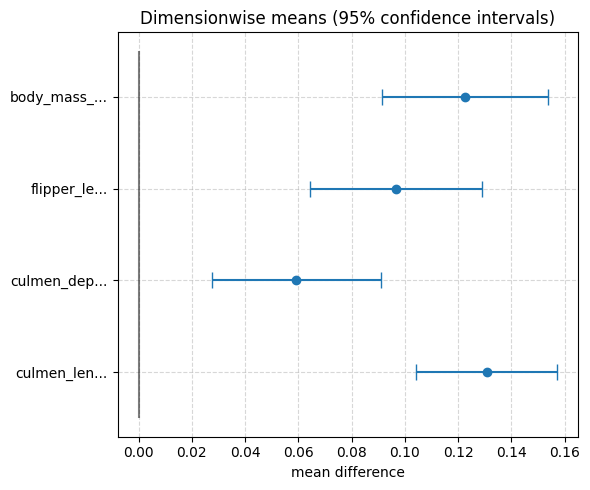

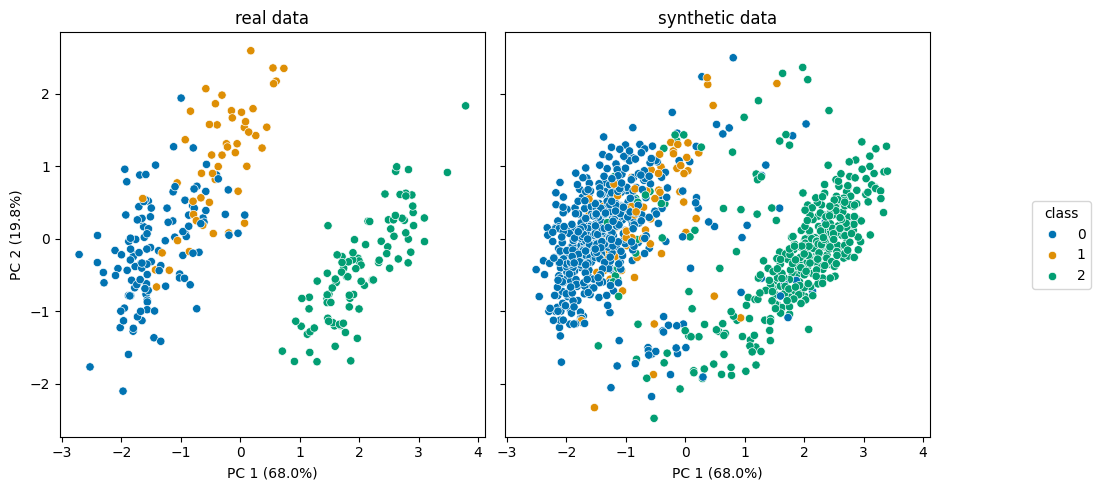

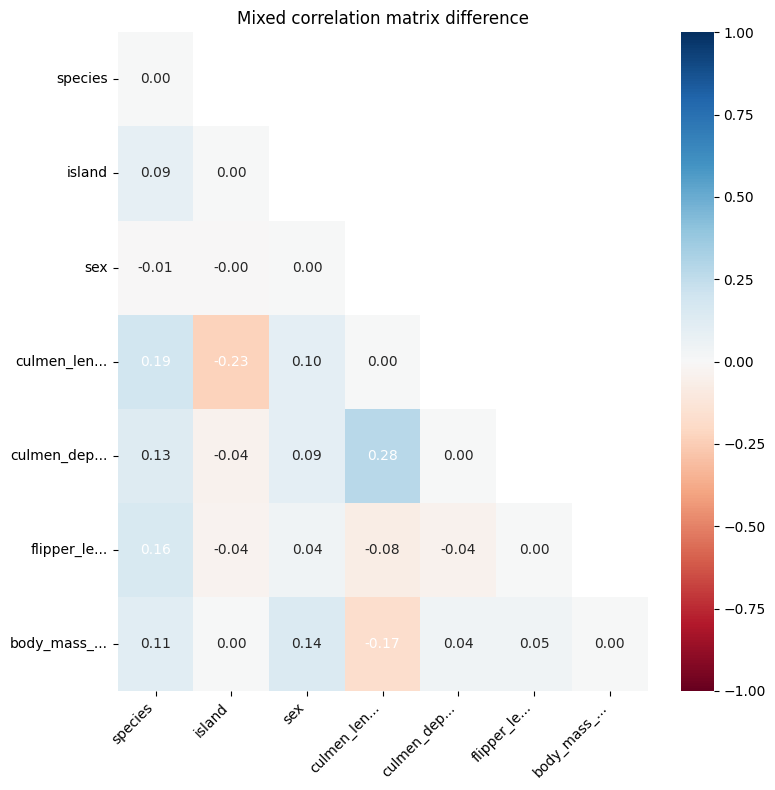

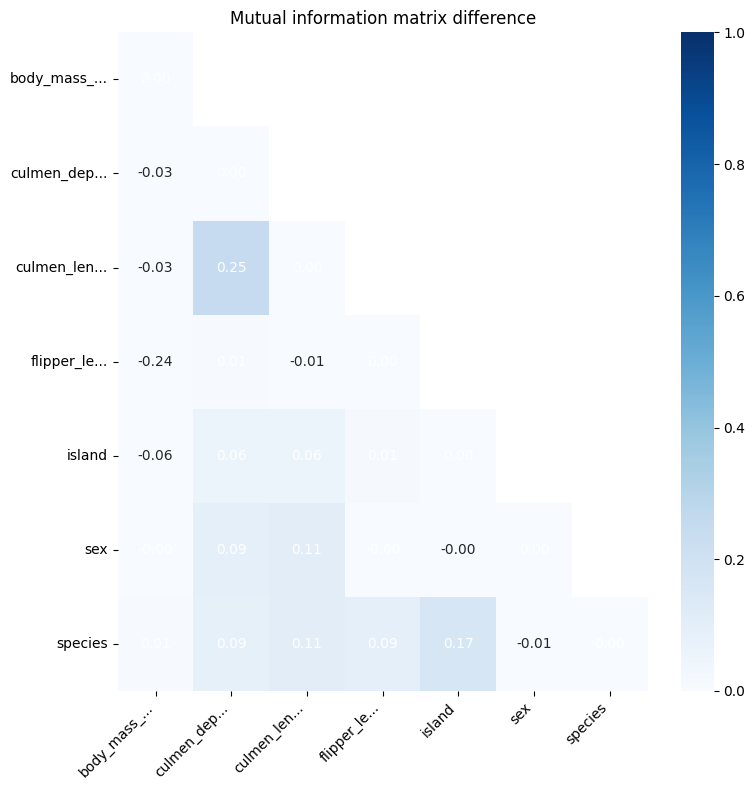

In [25]:
S = SynthEval(df_real)
_ = S.evaluate(df_fake,target_column,"full_eval")